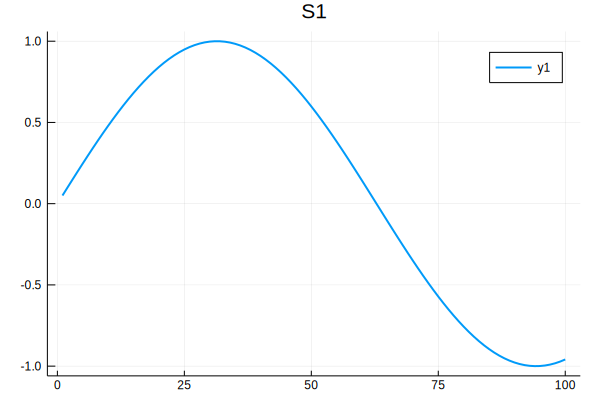

In [11]:
#using Pkg
#Pkg.add("Plots")

using Plots

s1 = sin.((1:100)./20)
plot(s1, linewidth=2, title = "S1")

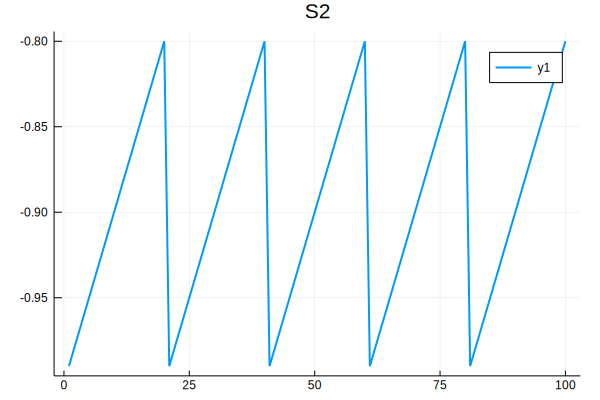

In [12]:
s2 = vec(repeat(((1:20).-100)/100, 5))
plot(s2,linewidth=2,title="S2")

In [13]:
#mixing matrix
A = [0.291 -0.5439 ; 0.6557 0.5572]
S = hcat(s1,s2)
X = S * A

100×2 Array{Float64,2}:
 -0.634599  -0.578812 
 -0.613534  -0.600355 
 -0.592543  -0.621763 
 -0.571659  -0.642968 
 -0.55092   -0.663903 
 -0.530362  -0.684501 
 -0.510018  -0.704698 
 -0.489923  -0.724429 
 -0.470112  -0.74363  
 -0.450617  -0.76224  
 -0.431471  -0.780198 
 -0.412705  -0.797445 
 -0.39435   -0.813925 
  ⋮                   
 -0.877727   0.018232 
 -0.874591   0.0301986
 -0.870745   0.0408364
 -0.86618    0.0501325
 -0.860893   0.0580778
 -0.85488    0.0646663
 -0.848139   0.0698953
 -0.840672   0.0737659
 -0.83248    0.0762823
 -0.823568   0.077452 
 -0.813941   0.0772861
 -0.803607   0.0757989

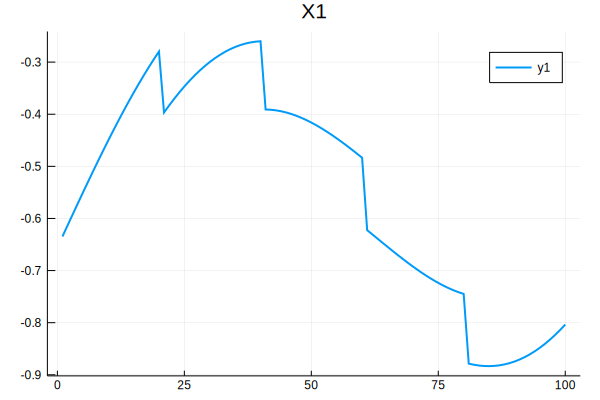

In [14]:
plot(X[:,1], linewidth=2, title = "X1")

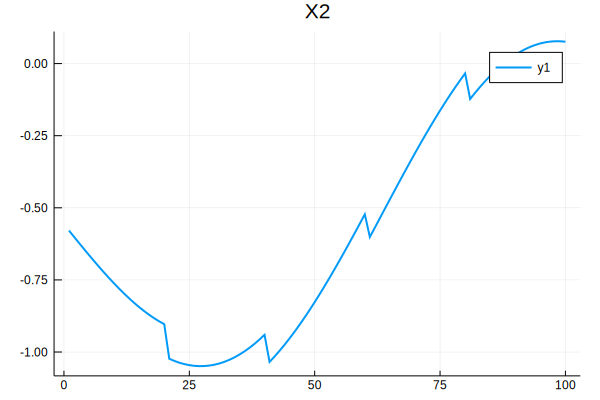

In [15]:
plot(X[:,2], linewidth=2, title = "X2")

In [7]:
include("fastICA.jl")
W = fastICA.whiten(X)
X1 =  X * W'
#fixed weights
iniwei = [1.02081 0.408655 ; -1.92523 -0.756068]

#direct call to deflation function to pass weights
a = fastICA.fast_ica_def(200,2,Array(X1'),0.0001,iniwei, 1.)
#a = fastICA.fast_ica(100,2,Array(X1'),0.0001,1.)
K = a * W
S = K * X'

Component n 1
iter = 1
[-0.577098, 15.4646]
Tolerance change for iter 1 = 0.6632561510067937
iter = 2
[-0.577455, 15.4681]
Tolerance change for iter 2 = 1.06455622095325e-10
Component n 2
iter = 1
[-0.707285, 0.726489]
Tolerance change for iter 1 = 0.0
retW = [-0.037306 0.999304; -0.999304 -0.037306]
Random matrix = [0.100705 -0.270326; -0.555839 -0.453269]
Component n 1
iter = 1
[0.577455, -15.4681]
Tolerance change for iter 1 = 0.050541458384237736
iter = 2
[0.577455, -15.4681]
Tolerance change for iter 2 = 1.1102230246251565e-16
Component n 2
iter = 1
[-0.707285, 0.726489]
Tolerance change for iter 1 = 0.0
retW = [0.037306 -0.999304; -0.999304 -0.037306]


2×100 Array{Float64,2}:
 -17.1316    -16.9538     -16.7761       …  -14.2863   -14.1122   -13.9379 
  -0.143493   -0.0719947   -0.000843408      -1.54302   -1.52619   -1.50599

In [17]:
include("fastICA.jl")
fastICA.whiten(X)

[0.0440176 -0.0800768; -0.0800768 0.156241]
val = [0.197908, 0.00234975]
vecs = [-0.461596 -0.88709; 0.88709 -0.461596]


2×2 Array{Float64,2}:
  -1.0376   1.99405
 -18.3002  -9.5225 

In [26]:
include("fastICA.jl")
fastICA.covariance_matrix(X)

2×2 Array{Float64,2}:
 0.172015  0.117813
 0.117813  0.24329 

In [27]:
include("fastICA.jl")
fastICA.covariance_matrix(X)

2×2 Array{Float64,2}:
 0.172015  0.117813
 0.117813  0.24329 